# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


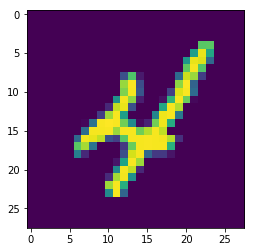

In [11]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
#Vanila Architecture
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.2649 - acc: 0.9237
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0920 - acc: 0.9732
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0649 - acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0503 - acc: 0.9842
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0407 - acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0334 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0268 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0223 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0187 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0148 - acc: 0.995

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print(score)

[0.07167063282476883, 0.9815]


In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[3.3985390e-17 5.1969045e-16 1.3304792e-12 3.5510237e-09 1.3787080e-17
  1.2374711e-15 3.9832299e-27 1.0000000e+00 2.6395030e-11 6.0455746e-10]
 [1.0280466e-11 1.6216427e-09 1.0000000e+00 5.5816074e-11 9.4247921e-22
  2.5030776e-14 6.6367987e-11 3.2623432e-22 5.6398344e-11 1.1739880e-18]
 [1.4460444e-08 9.9996233e-01 5.1926895e-07 1.1613754e-08 2.9744102e-05
  3.0602236e-09 8.5841273e-10 1.3906028e-07 7.2169960e-06 5.0141331e-09]
 [9.9999988e-01 1.4408301e-14 3.2185952e-08 5.6421170e-14 7.3435371e-14
  1.7697949e-11 1.2824395e-07 1.1748140e-11 3.9119841e-10 5.7121261e-12]
 [4.4191322e-12 1.2417950e-14 7.3689744e-12 9.5040698e-10 9.9998558e-01
  2.4536207e-15 3.3730228e-12 1.2131938e-09 2.4332064e-07 1.4169559e-05]
 [6.1588140e-10 9.9995720e-01 9.9759276e-09 2.3672366e-09 5.3007811e-06
  3.2609388e-12 1.4659397e-12 2.8102142e-05 9.4638599e-06 7.4438589e-09]
 [3.0093046e-17 9.1477581e-12 4.5798421e-11 3.2557138e-14 9.9843210e-01
  5.0616372e-10 3.2700242e-16 4.2127191e-09 1.5673848e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

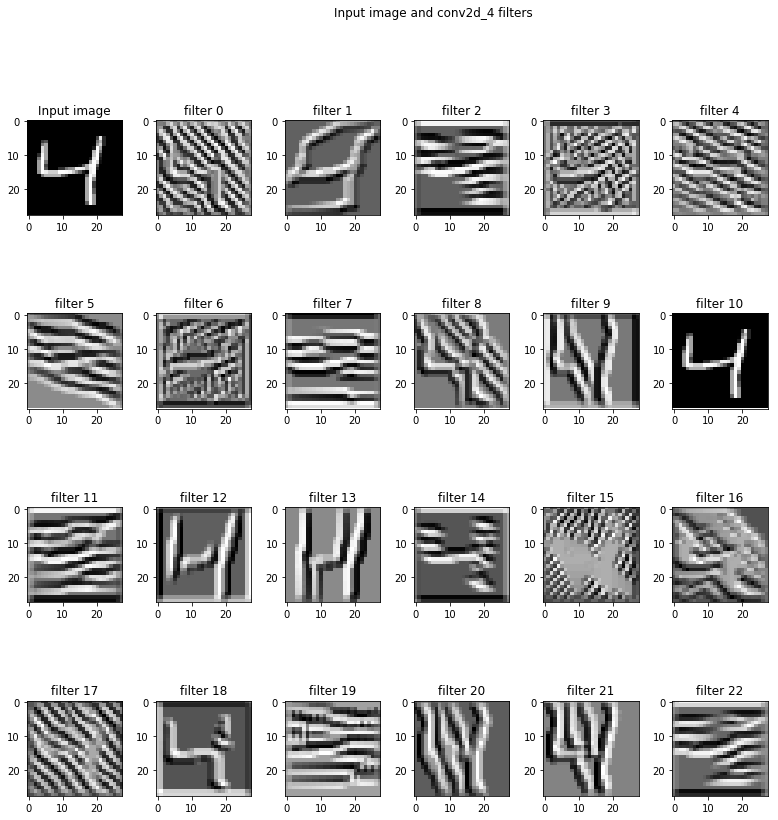

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()